<a href="https://colab.research.google.com/github/MakrandDhanokar/CDAC-DAI/blob/main/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
pd.__version__

'2.2.2'

In [3]:
# RANDOM_STATE = 24
# np.random.RandomState(seed=RANDOM_STATE)

# TEST_SIZE = 0.2

# inpDir = '../input'
# outDir = '../output'

# params = {'legend.fontsize': 'medium',
#           'figure.figsize': (15,4),
#           'axes.labelsize': 'medium',
#           'axes.titlesize':'large',
#           'xtick.labelsize':'medium',
#           'ytick.labelsize':'medium',
#           # 'text.usetex': True,
#           # 'text.latex.unicode': True,
#           }
# plt.rcParams.update(params)

# CMAP = plt.cm.coolwarm
# plt.style.use('seaborn-v0_8-darkgrid')

import matplotlib.pyplot as plt

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

TEST_SIZE = 0.2

inpDir = '../input'
outDir = '../output'

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15,4),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'text.usetex': False, # Explicitly disable LaTeX rendering
          }
plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [5]:
data_df['target'].value_counts()

,count
target,
1,357
0,212


<BarContainer object of 2 artists>

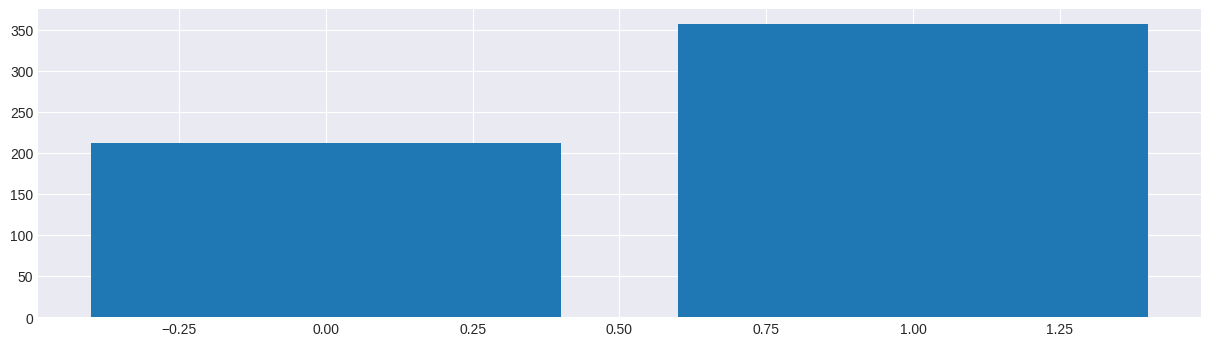

In [6]:
labels = ['malignant', 'benign']

fig, ax = plt.subplots()

ax.bar(data_df['target'].value_counts().index,
       data_df['target'].value_counts().values)

([<matplotlib.patches.Wedge at 0x7d8e27ff3f70>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'malignant'),
  Text(0.46762320557394, -1.1051373387994603, 'benign')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.27278020325146496, -0.6446634476330184, '37.3%')])

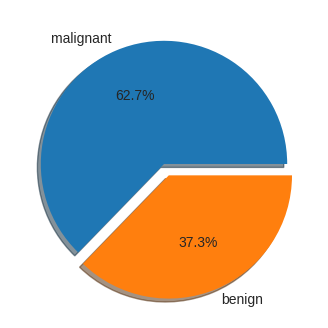

In [7]:
fig, ax = plt.subplots()

explode = (0, 0.1)

ax.pie(data_df['target'].value_counts().values,
       labels=labels,
       explode=explode,
       autopct='%1.1f%%',
       shadow=True,
       startangle=0)

In [8]:
# Split Data in Test Train
features_df = data_df.drop('target', axis=1)
labels = data_df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    labels,
                                                    test_size=TEST_SIZE,
                                                    stratify=labels,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [10]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
X_train['target'] = y_train
X_train.sort_values(by='total', inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0


In [11]:
X_train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
555,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
503,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
450,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
475,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
550,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


In [12]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)
X_test['target'] = y_test
X_test.sort_values(by='total', inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
27,0,1,0,0,1,0,0,0,1,1,...,0,0,1,1,1,0,1,1,20,0


In [15]:
accuracy = {}
for b in range(X_train.shape[1]): #looping over the columns

  X_train['pred'] = X_train['total'] >= b # comparing with b to get output

  accuracy[b] = accuracy_score(y_true = X_train['target'], y_pred = X_train['pred'])

accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363,
 32: 0.37362637362637363}

In [26]:
list = [value for key,value in accuracy.items()]
np.argmax(list)

27

In [28]:
best_b = max(accuracy, key=accuracy.get)
best_b

27

In [30]:
accuracy[best_b]

0.8505494505494505

# ***`On Testing Data`***

In [29]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true = X_test['target'], y_pred = X_test['pred'])

0.868421052631579

In [31]:
0

0